# Part 1 - Desicion Tree

In [1]:
from sklearn import tree

In [2]:
import pandas as pd

In [3]:
test_csv = pd.read_csv("data/Guanzigou.csv")

In [4]:
dt = tree.DecisionTreeClassifier(max_depth=5,min_samples_leaf=5,random_state=2,criterion='entropy',class_weight='balanced')

In [5]:
input_csv = test_csv.drop(['ID'],axis = 1)

In [6]:
input_csv = input_csv.fillna(0)
input_csv[:10]

,Sex,Age,Health,Education,Level_before,Level_after,difference,Join
0,0,66,1,1,0,0,0,1
1,1,64,1,1,0,0,0,1
2,0,42,2,2,0,0,0,0
3,0,40,2,2,0,0,0,0
4,0,40,2,2,0,0,0,0
5,1,27,2,2,0,0,0,1
6,0,67,1,1,0,0,0,1
7,0,72,1,1,2,1,1,2
8,1,68,1,1,2,1,1,1
9,0,40,2,3,2,1,1,0


In [7]:
X = input_csv.drop(['Join','Level_before','Level_after'],axis=1).as_matrix()

In [8]:
y = input_csv['Join'].as_matrix()

In [9]:
from sklearn.cross_validation import train_test_split 

/Applications/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
X_train,X_test = train_test_split(X)

In [11]:
print (X_train.size,X_test.size)

195 70


In [12]:
y_train,y_test = train_test_split(y)

In [13]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=5, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=2, splitter='best')

In [14]:
y_pre = dt.predict(X_test)
y_pre

array([1, 0, 2, 2, 0, 2, 2, 2, 0, 1, 2, 0, 1, 2])

In [15]:
y_test

array([1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 0, 1, 2])

In [16]:
dt.score(X_test,y_test)

0.42857142857142855

# Decision Tree 2.0

In [17]:
input_binary = input_csv
input_binary['Join'] = input_binary['Join'].replace(2,1)

In [18]:
X = input_binary.drop(['Join','Level_before','Level_after'],axis=1).as_matrix()

In [19]:
y = input_binary['Join'].as_matrix()

In [20]:
X_train,X_test = train_test_split(X)
y_train,y_test = train_test_split(y)
dt.fit(X_train,y_train)
y_pre = dt.predict(X_test)
y_pre

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [21]:
y_test

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1])

In [22]:
dt.score(X_test,y_test)

0.42857142857142855

### 1000 Times accuracy average

In [23]:
acc = 0
for i in range(1000):
    X_train,X_test = train_test_split(X)
    y_train,y_test = train_test_split(y)
    dt.fit(X_train,y_train)
    y_pre = dt.predict(X_test)
    acc = acc + (sum(y_test==y_pre))/y_test.size
print ("average accracy:",acc/1000)

average accracy: 0.504428571429


### test for another table --Qingmu

In [24]:
Qingmu = pd.read_csv("data/Qingmu.csv")

In [25]:
Qingmu = Qingmu.drop(["ID"],axis = 1 ).fillna(0)
Qingmu['Join'] = Qingmu['Join'].replace(2,1)

In [26]:
X_qm = Qingmu.drop(['Join','Level_before','Level_after'],axis=1).as_matrix()
y_qm = Qingmu['Join'].as_matrix()

In [27]:
y_qm_pre = dt.predict(X_qm)
print(y_qm)
print(y_qm_pre)

[1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0
 0]
[0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0
 0]


In [28]:
dt.score(X_qm,y_qm)

0.39473684210526316

In [29]:
from IPython.display import Image
from sklearn.datasets import load_iris

In [30]:
iris = load_iris()
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(dt, out_file=f)


In [44]:
import graphviz
import pydot
from io import StringIO

dot_data = StringIO()  
tree.export_graphviz(dt, out_file=dot_data, feature_names=input_binary.columns)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

AttributeError: 'list' object has no attribute 'create_png'

## Visualizition

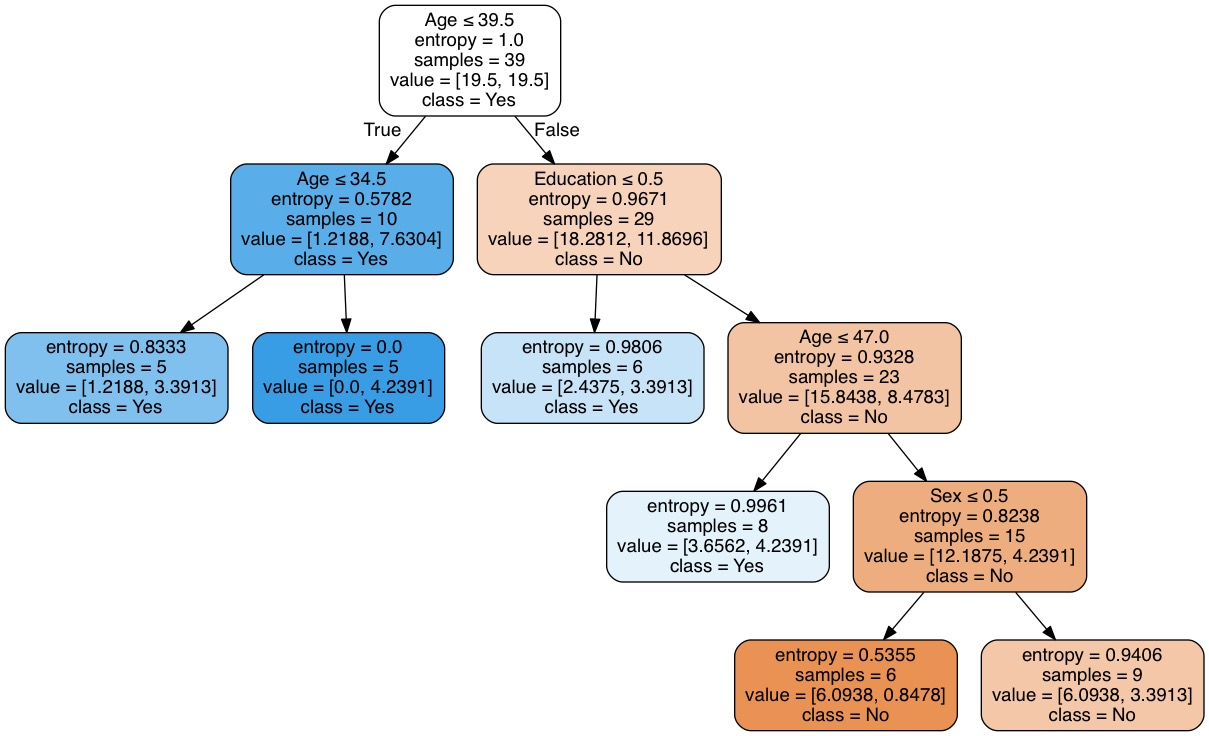

In [53]:
f_name = input_binary.drop(['Join','Level_before','Level_after'],axis=1).columns.tolist()
dot_data = StringIO() 
tree.export_graphviz(dt, out_file=dot_data, 
                                feature_names=f_name,
                         class_names=['No','Yes'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_jpg())

In [ ]:
input_binary.drop(['Join','Level_before','Level_after'],axis=1).columns.tolist()

# Test for Putuo

In [ ]:
Putuo = pd.read_csv('data/Putuo.csv')

In [ ]:
Putuo = Putuo.drop(["ID"],axis = 1 ).fillna(0)
Putuo['Join'] = Putuo['Join'].replace(2,1)
X_pt = Putuo.drop(['Join','Level_before','Level_after'],axis=1).as_matrix()
y_pt = Putuo['Join'].as_matrix()
y_pt_pre = dt.predict(X_pt)
print(y_pt)
print(y_pt_pre)

In [ ]:
dt.score(X_pt,y_pt)

In [ ]:
(dt.score(X_pt,y_pt)+dt.score(X_qm,y_qm))/2

# Decision Tree 3.0

## 通过GridSearchCV来寻求最佳参数空间

In [ ]:
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
pipeline=Pipeline([('clf',tree.DecisionTreeClassifier(criterion='entropy'))])
parameters = {
'clf__random_state': (None,1,2),
'clf__max_depth': (None,3,4,5),
'clf__min_samples_split': (2, 3, 4),
'clf__min_samples_leaf': (1, 2, 3)
}

In [ ]:
grid_search=GridSearchCV(pipeline,parameters,n_jobs=-1,
                         verbose=1,scoring='f1')

In [ ]:
grid_search.fit(X_train,y_train)

In [ ]:
print ('最佳效果：%0.3f'%grid_search.best_score_)
print ('最优参数')
best_parameters=grid_search.best_estimator_.get_params()
dt_best = best_parameters['clf']

In [ ]:
f_name = input_binary.drop(['Join','Level_before','Level_after'],axis=1).columns.tolist()
dot_data = tree.export_graphviz(dt_best, out_file=None, 
                                feature_names=f_name,
                         class_names=['No','Yes'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

In [ ]:
dt_best.score(X_qm,y_qm)

In [ ]:
dt_best.score(X_pt,y_pt)